# Section 1: Business Understanding

In this project I will explore three main cities in Saudi Arabia. 
Those Cities are: Jeddah, Riyadh, and Dammam.
The idea is to find what are the most popular venues in those cities for investors to understand what is the market trend and where to invest.

## Question 1: what are the most popular venues categories in each city?
## Question 2: Do those categories differ from one city to another?
## Question 3: Is the location of a venue influences its popularity?

**Importing and installing all required libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import folium # map rendering library

print("All Libraries are imported")

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


All Libraries are imported


# Section 2: Data Understanding

**Part two: creating a data frame & finding the coordination for each city**

In [2]:
#Here I have chosen the three main cities in Saudi Arabia and by using geopy library I got the coordinates for each city
cities = ['Jeddah', 'Riyadh', 'Dammam']

Latitude = []
Longitude = []
for city in cities:
    address= city
    geolocator = Nominatim(user_agent="KSA")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    Latitude.append(latitude)
    Longitude.append(longitude)
print(Latitude, Longitude)

[21.5810088, 24.638916, 26.4367824] [39.1653612, 46.7160104, 50.1039991]


In [3]:
#Here I have established the dataframe containing the cities and their respective latitudes and longitudes
Dict = {'City':cities, 'Latitude':Latitude, 'Longitude':Longitude}
df_cities = pd.DataFrame(Dict)
df_cities

,City,Latitude,Longitude
0,Jeddah,21.581009,39.165361
1,Riyadh,24.638916,46.716010
2,Dammam,26.436782,50.103999


**Part three: using Foursquere API to explore the cities**

In [4]:
CLIENT_ID = '2KODADBSGSRUVTSQITQOKDG4IMOPNWPWRD0MGRCV1DTCFYSJ' # Foursquare ID
CLIENT_SECRET = 'PTM2B4G5AO5PF2LQQ2HJRP1MUPYBZVWC5T1VK5YQERGRSQW1' # Foursquare Secret
ACCESS_TOKEN = 'TVDHMYKMCHV3VO2RV4NBKENWCTU02GY4ZRPGZC0TAPUQCCKT' # FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2KODADBSGSRUVTSQITQOKDG4IMOPNWPWRD0MGRCV1DTCFYSJ
CLIENT_SECRET:PTM2B4G5AO5PF2LQQ2HJRP1MUPYBZVWC5T1VK5YQERGRSQW1


In [5]:
#Here we explore the venues in Jeddah city & we limit the number of returned venues by 100 & the raduis of exploring to 5km
city_name = df_cities.loc[0, 'City']
city_latitude = df_cities.loc[0, 'Latitude'] 
city_longitude = df_cities.loc[0, 'Longitude'] 
LIMIT = 100 
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [6]:
#When you obtain the json file from FourSquare, categories are not labeled directly as we are going to see down. Hence this function is created
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
#Transferring the json file to dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)

<ipython-input-7-899cce21d988>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues)


In [8]:
print(nearby_venues.shape)
nearby_venues.head()
#if you go to venues.category columns, you will find that the vlues can't be understanded.

(100, 22)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood,venue.venuePage.id
0,e-0-5dc7f457efdd17000742430d-0,0,"[{'summary': 'This spot is popular', 'type': '...",5dc7f457efdd17000742430d,Starbucks,jeddah - alfisliah,jeddah sari street,21.579102,39.166322,"[{'label': 'display', 'lat': 21.579102, 'lng':...",234,23442,SA,جدة,منطقة مكة,المملكة العربية السعودية,"[jeddah - alfisliah (jeddah sari street), جدة ...","[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",0,[],NaN,NaN
1,e-0-4e36ab0a1838f85189b354f2-1,0,"[{'summary': 'This spot is popular', 'type': '...",4e36ab0a1838f85189b354f2,Talah Aljood (تالة الجود),"Sari St, Salamah Dist",NaN,21.579704,39.161000,"[{'label': 'display', 'lat': 21.57970401570659...",474,NaN,SA,جدة,منطقة مكة,المملكة العربية السعودية,"[Sari St, Salamah Dist, جدة, المملكة العربية ا...","[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",0,[],NaN,NaN
2,e-0-5c2305f2e97dfb002c612b59-2,0,"[{'summary': 'This spot is popular', 'type': '...",5c2305f2e97dfb002c612b59,Fitness Time Ladies,شارع صقر قريش - حي السلامة,Saqr Quraysh Street,21.585359,39.161615,"[{'label': 'display', 'lat': 21.58535945892765...",620,23436,SA,جدة,منطقة مكة,المملكة العربية السعودية,[شارع صقر قريش - حي السلامة (Saqr Quraysh Stre...,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",0,[],NaN,NaN
3,e-0-60a63382c9224a7f16f9c0ca-3,0,"[{'summary': 'This spot is popular', 'type': '...",60a63382c9224a7f16f9c0ca,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Saqr Quraysh Street,NaN,21.584839,39.159807,"[{'label': 'display', 'lat': 21.584839, 'lng':...",715,23436,SA,جدة,منطقة مكة,المملكة العربية السعودية,"[Saqr Quraysh Street, جدة 23436, المملكة العرب...","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],NaN,NaN
4,e-0-57ab80bf498eef084fea6fbe-4,0,"[{'summary': 'This spot is popular', 'type': '...",57ab80bf498eef084fea6fbe,Ma'asob Alsultan (معصوب السلطان),NaN,NaN,21.589741,39.165862,"[{'label': 'display', 'lat': 21.58974122929638...",973,NaN,SA,جدة,منطقة مكة,المملكة العربية السعودية,"[جدة, المملكة العربية السعودية]","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],NaN,NaN


In [9]:
#Here we explore the venues in Riyadh city & we limit the number of returned venues by 100 & the raduis of exploring to 5km
city_name = df_cities.loc[1, 'City']
city_latitude = df_cities.loc[1, 'Latitude'] 
city_longitude = df_cities.loc[1, 'Longitude'] 
LIMIT = 100 
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [10]:
venues = results['response']['groups'][0]['items']
nearby_venues1 = json_normalize(venues)

<ipython-input-10-dbb35d8bb880>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues1 = json_normalize(venues)


In [11]:
print(nearby_venues1.shape)
nearby_venues1.head()

(100, 22)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.city,venue.location.postalCode,venue.location.neighborhood,venue.location.crossStreet,venue.venuePage.id
0,e-0-4ff2a82de4b055dd1c18642d-0,0,"[{'summary': 'This spot is popular', 'type': '...",4ff2a82de4b055dd1c18642d,Al-Garaawi,Batha Main Road,24.642024,46.717322,"[{'label': 'display', 'lat': 24.64202381102391...",370,SA,منطقة الرياض‎,المملكة العربية السعودية,"[Batha Main Road, المملكة العربية السعودية]","[{'id': '4bf58dd8d48988d107951735', 'name': 'S...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-4cb88d8cdd41a35dcbcadba0-1,0,"[{'summary': 'This spot is popular', 'type': '...",4cb88d8cdd41a35dcbcadba0,Masmak Fortress (قصر المصمك),Downtown Riyadh nearby Imam Turki Bin Abdullah...,24.631262,46.713420,"[{'label': 'display', 'lat': 24.631262, 'lng':...",891,SA,Deera,المملكة العربية السعودية,[Downtown Riyadh nearby Imam Turki Bin Abdulla...,"[{'id': '50aaa49e4b90af0d42d5de11', 'name': 'C...",0,[],Riyadh,NaN,NaN,NaN,NaN
2,e-0-5ee0f9fdfb79563b32400b7e-2,0,"[{'summary': 'This spot is popular', 'type': '...",5ee0f9fdfb79563b32400b7e,Qormuz (قرمز),3227 Al Thumairy Street,24.630708,46.714034,"[{'label': 'display', 'lat': 24.630708, 'lng':...",935,SA,منطقة الرياض‎,المملكة العربية السعودية,"[3227 Al Thumairy Street, الرياض 12634, المملك...","[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",0,[],الرياض,12634,NaN,NaN,NaN
3,e-0-538b6fd9498e6050303ccd38-3,0,"[{'summary': 'This spot is popular', 'type': '...",538b6fd9498e6050303ccd38,Al Thomairi Old Market (سوق الثميري القديم),شارع الوزير,24.630015,46.713228,"[{'label': 'display', 'lat': 24.63001527496521...",1030,SA,منطقة الرياض‎,المملكة العربية السعودية,"[شارع الوزير, الرياض, المملكة العربية السعودية]","[{'id': '52f2ab2ebcbc57f1066b8b26', 'name': 'F...",0,[],الرياض,NaN,NaN,NaN,NaN
4,e-0-4f0f3993e4b0a8783f232d08-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f0f3993e4b0a8783f232d08,مشويات الاطلال,الامير فيصل بن تركي الخزان سابقا,24.638109,46.711128,"[{'label': 'display', 'lat': 24.63810922928629...",502,SA,منطقة الرياض‎,المملكة العربية السعودية,"[الامير فيصل بن تركي الخزان سابقا, الرياض, الم...","[{'id': '4bf58dd8d48988d115941735', 'name': 'M...",0,[],الرياض,NaN,NaN,NaN,NaN


In [12]:
#Here we explore the venues in Dammam city & we limit the number of returned venues by 100 & the raduis of exploring to 5km
city_name = df_cities.loc[2, 'City']
city_latitude = df_cities.loc[2, 'Latitude'] 
city_longitude = df_cities.loc[2, 'Longitude'] 
LIMIT = 100 
radius = 5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    city_latitude, 
    city_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [13]:
venues = results['response']['groups'][0]['items']
nearby_venues2 = json_normalize(venues)

<ipython-input-13-35ed12fe44c4>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues2 = json_normalize(venues)


In [14]:
print(nearby_venues2.shape)
nearby_venues2.head()

(100, 22)


,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-4f4e83b0e4b0ed3694a6baeb-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f4e83b0e4b0ed3694a6baeb,KITCHEN HADRMOUT (مطبخ ومطعم حضرموت),26.434712,50.098633,"[{'label': 'display', 'lat': 26.43471243570665...",582,SA,Dammām,الشرقية,المملكة العربية السعودية,"[Dammām, المملكة العربية السعودية]","[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-5de66fd0d802bd0008e46429-1,0,"[{'summary': 'This spot is popular', 'type': '...",5de66fd0d802bd0008e46429,مجوهرات ضياء الناصر,26.445071,50.103030,"[{'label': 'display', 'lat': 26.445071, 'lng':...",927,SA,Dammām,الشرقية,المملكة العربية السعودية,"[الدمام سوق الحُب (شارع الملك فهد), Dammām 324...","[{'id': '4bf58dd8d48988d111951735', 'name': 'J...",0,[],الدمام سوق الحُب,شارع الملك فهد,32416,DAMMAM SOUQ,573658436
2,e-0-50ac9ed2e4b0dc61eb6f3957-2,0,"[{'summary': 'This spot is popular', 'type': '...",50ac9ed2e4b0dc61eb6f3957,مطعم هامور وهج,26.431684,50.115110,"[{'label': 'display', 'lat': 26.431683583698, ...",1244,SA,NaN,NaN,المملكة العربية السعودية,[المملكة العربية السعودية],"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",0,[],NaN,NaN,NaN,NaN,NaN
3,e-0-59f0831d61f070300665517c-3,0,"[{'summary': 'This spot is popular', 'type': '...",59f0831d61f070300665517c,Wyndham Garden Dammam,26.427482,50.097544,"[{'label': 'display', 'lat': 26.42748212380894...",1218,SA,Dammām,الشرقية,المملكة العربية السعودية,"[21st St, Dammām 32242, المملكة العربية السعودية]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],21st St,NaN,32242,NaN,NaN
4,e-0-4f099709e4b0803b69f908f1-4,0,"[{'summary': 'This spot is popular', 'type': '...",4f099709e4b0803b69f908f1,ملتقى الخبازين,26.442320,50.113074,"[{'label': 'display', 'lat': 26.44232010930869...",1094,SA,Dammām,الشرقية,المملكة العربية السعودية,"[King Saud St, Dammām, المملكة العربية السعودية]","[{'id': '4bf58dd8d48988d1f5941735', 'name': 'G...",0,[],King Saud St,NaN,NaN,NaN,NaN


# Section 3: Data Preparing

**Part Four: Data cleaning & analyzing**

In [15]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city']
nearby_venues =nearby_venues.loc[:, filtered_columns]
#we apply early created function to have a meaningful category value
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng,city
0,Starbucks,Coffee Shop,21.579102,39.166322,جدة
1,Talah Aljood (تالة الجود),Dessert Shop,21.579704,39.161000,جدة
2,Fitness Time Ladies,Gym / Fitness Center,21.585359,39.161615,جدة
3,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Café,21.584839,39.159807,جدة
4,Ma'asob Alsultan (معصوب السلطان),Breakfast Spot,21.589741,39.165862,جدة


In [16]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]
nearby_venues1.head()

,name,categories,lat,lng,city
0,Al-Garaawi,Shoe Store,24.642024,46.717322,NaN
1,Masmak Fortress (قصر المصمك),Castle,24.631262,46.713420,Riyadh
2,Qormuz (قرمز),Jewelry Store,24.630708,46.714034,الرياض
3,Al Thomairi Old Market (سوق الثميري القديم),Fabric Shop,24.630015,46.713228,الرياض
4,مشويات الاطلال,Middle Eastern Restaurant,24.638109,46.711128,الرياض


In [17]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns]
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]
nearby_venues2.head()

,name,categories,lat,lng,city
0,KITCHEN HADRMOUT (مطبخ ومطعم حضرموت),Restaurant,26.434712,50.098633,Dammām
1,مجوهرات ضياء الناصر,Jewelry Store,26.445071,50.103030,Dammām
2,مطعم هامور وهج,Seafood Restaurant,26.431684,50.115110,NaN
3,Wyndham Garden Dammam,Hotel,26.427482,50.097544,Dammām
4,ملتقى الخبازين,Gourmet Shop,26.442320,50.113074,Dammām


In [18]:
#In here and the upcoming to cells the city name is changed and formalized
nearby_venues2['city'] = nearby_venues2['city'].replace(['Dammām', 'Ad Dammam, Al Khobar', 'dammam', 'Dammam', 'Khobar', 'الدمام'],'Dammam')
nearby_venues2 = nearby_venues2.fillna(value='Dammam')
nearby_venues2.head()

,name,categories,lat,lng,city
0,KITCHEN HADRMOUT (مطبخ ومطعم حضرموت),Restaurant,26.434712,50.098633,Dammam
1,مجوهرات ضياء الناصر,Jewelry Store,26.445071,50.103030,Dammam
2,مطعم هامور وهج,Seafood Restaurant,26.431684,50.115110,Dammam
3,Wyndham Garden Dammam,Hotel,26.427482,50.097544,Dammam
4,ملتقى الخبازين,Gourmet Shop,26.442320,50.113074,Dammam


In [19]:
nearby_venues['city'] = nearby_venues['city'].replace(['جدّة', 'جدة', 'Jeddah', 'Al Faisaliyyah'],'Jeddah')
nearby_venues = nearby_venues.fillna(value='Jeddah')
nearby_venues.head()

,name,categories,lat,lng,city
0,Starbucks,Coffee Shop,21.579102,39.166322,Jeddah
1,Talah Aljood (تالة الجود),Dessert Shop,21.579704,39.161000,Jeddah
2,Fitness Time Ladies,Gym / Fitness Center,21.585359,39.161615,Jeddah
3,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Café,21.584839,39.159807,Jeddah
4,Ma'asob Alsultan (معصوب السلطان),Breakfast Spot,21.589741,39.165862,Jeddah


In [20]:
nearby_venues1['city'] = nearby_venues1['city'].replace(['الرياض', 'Riyadh', 'Riyad'],'Riyadh')
nearby_venues1 = nearby_venues1.fillna(value='Riyadh')
nearby_venues1.head()

,name,categories,lat,lng,city
0,Al-Garaawi,Shoe Store,24.642024,46.717322,Riyadh
1,Masmak Fortress (قصر المصمك),Castle,24.631262,46.713420,Riyadh
2,Qormuz (قرمز),Jewelry Store,24.630708,46.714034,Riyadh
3,Al Thomairi Old Market (سوق الثميري القديم),Fabric Shop,24.630015,46.713228,Riyadh
4,مشويات الاطلال,Middle Eastern Restaurant,24.638109,46.711128,Riyadh


In [21]:
#merginf all three dataframes for the three cities
df_venues = pd.concat([nearby_venues, nearby_venues1, nearby_venues2], ignore_index=True)
df_venues.head()

,name,categories,lat,lng,city
0,Starbucks,Coffee Shop,21.579102,39.166322,Jeddah
1,Talah Aljood (تالة الجود),Dessert Shop,21.579704,39.161000,Jeddah
2,Fitness Time Ladies,Gym / Fitness Center,21.585359,39.161615,Jeddah
3,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Café,21.584839,39.159807,Jeddah
4,Ma'asob Alsultan (معصوب السلطان),Breakfast Spot,21.589741,39.165862,Jeddah


In [22]:
#This is like a checkpoint to verify that each city has 100 value linked to it.
df_venues.groupby('city').count()

,name,categories,lat,lng
city,,,,
Dammam,100,100,100,100
Jeddah,100,100,100,100
Riyadh,100,100,100,100


In [23]:
#Bring the city column to be the first column
fixed_columns = [df_venues.columns[-1]] + list(df_venues.columns[:-1])
df_venues = df_venues[fixed_columns]
df_venues.head()

,city,name,categories,lat,lng
0,Jeddah,Starbucks,Coffee Shop,21.579102,39.166322
1,Jeddah,Talah Aljood (تالة الجود),Dessert Shop,21.579704,39.161000
2,Jeddah,Fitness Time Ladies,Gym / Fitness Center,21.585359,39.161615
3,Jeddah,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Café,21.584839,39.159807
4,Jeddah,Ma'asob Alsultan (معصوب السلطان),Breakfast Spot,21.589741,39.165862


In [24]:
#Changing the name of each column to be formal
df_venues.rename(columns={'city': 'City', 'name': 'Venue Name', 'categories': 'Category', 'lat': 'Latitude', 'lng': 'Longitude'}, inplace=True)

In [25]:
df_venues.head()

,City,Venue Name,Category,Latitude,Longitude
0,Jeddah,Starbucks,Coffee Shop,21.579102,39.166322
1,Jeddah,Talah Aljood (تالة الجود),Dessert Shop,21.579704,39.161000
2,Jeddah,Fitness Time Ladies,Gym / Fitness Center,21.585359,39.161615
3,Jeddah,LaFamiglia Bistro Cafe (لافاميليا بيسترو كافيه),Café,21.584839,39.159807
4,Jeddah,Ma'asob Alsultan (معصوب السلطان),Breakfast Spot,21.589741,39.165862


In [26]:
#By using get_dummies we make categorical variable into 0 & 1. Indications if those categories exist or not.
KSACities = pd.get_dummies(df_venues[['Category']], prefix="", prefix_sep="")
KSACities['City'] = df_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [KSACities.columns[-1]] + list(KSACities.columns[:-1])
KSACities = KSACities[fixed_columns]

KSACities.head()

,City,Afghan Restaurant,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Beach,Big Box Store,Bookstore,Boxing Gym,Breakfast Spot,Burger Joint,Café,Candy Store,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Roaster,Coffee Shop,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Doner Restaurant,Donut Shop,Exhibit,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gourmet Shop,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lebanese Restaurant,Lounge,Market,Middle Eastern Restaurant,Motel,Museum,Music Store,National Park,New American Restaurant,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pie Shop,Pizza Place,Plaza,Pool,Print Shop,Public Art,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Supermarket,Tailor Shop,Tea Room,Tennis Court,Theme Restaurant,Trail,Tram Station,Video Store,Waterfront,Women's Store
0,Jeddah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jeddah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jeddah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Jeddah,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Jeddah,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
KSACities.shape

(300, 102)

In [28]:
#Since we linked cities to venues categories through numirical indicators, we are able to have the mean of each category in respect to each city.
KSACities_grouped = KSACities.groupby('City').mean().reset_index()
KSACities_grouped

,City,Afghan Restaurant,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Beach,Big Box Store,Bookstore,Boxing Gym,Breakfast Spot,Burger Joint,Café,Candy Store,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Roaster,Coffee Shop,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Doner Restaurant,Donut Shop,Exhibit,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gourmet Shop,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lebanese Restaurant,Lounge,Market,Middle Eastern Restaurant,Motel,Museum,Music Store,National Park,New American Restaurant,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pie Shop,Pizza Place,Plaza,Pool,Print Shop,Public Art,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Supermarket,Tailor Shop,Tea Room,Tennis Court,Theme Restaurant,Trail,Tram Station,Video Store,Waterfront,Women's Store
0,Dammam,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.02,0.01,0.04,0.01,0.01,0.01,0.00,0.00,0.02,0.00,0.01,0.17,0.01,0.00,0.00,0.03,0.01,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.01,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.00,0.00,0.01,0.05,0.00,0.01,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.02,0.01,0.01,0.03,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00
1,Jeddah,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.04,0.00,0.05,0.00,0.00,0.01,0.00,0.01,0.00,0.24,0.02,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.06,0.00,0.01,0.00,0.01,0.01,0.04,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00
2,Riyadh,0.00,0.00,0.00,0.03,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.00,0.08,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.13,0.01,0.00,0.01,0.02,0.00,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.03,0.01,0.01,0.01,0.00,0.03,0.01,0.00,0.00,0.02,0.06,0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.01,0.02,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01


In [29]:
#In the below loop the highset five venues category are showed
num_top_venues = 5

for city in KSACities_grouped['City']:
    print("----"+city+"----")
    temp = KSACities_grouped[KSACities_grouped['City'] == city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dammam----
                       venue  freq
0                Coffee Shop  0.17
1                     Bakery  0.06
2                Supermarket  0.05
3  Middle Eastern Restaurant  0.05
4                  Juice Bar  0.05


----Jeddah----
            venue  freq
0     Coffee Shop  0.24
1  Ice Cream Shop  0.06
2            Café  0.05
3           Hotel  0.04
4    Dessert Shop  0.04


----Riyadh----
                       venue  freq
0                Coffee Shop  0.13
1             Breakfast Spot  0.08
2  Middle Eastern Restaurant  0.06
3                 Donut Shop  0.05
4                      Hotel  0.03




# Section 4: Data Analysis

In [30]:
#This function is to sort the categry when applied in the following cell
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
#creating a dataframe showing the most ten populer trends in each of the three cities
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

CitiesTopTenVenues = pd.DataFrame(columns=columns)
CitiesTopTenVenues['City'] = KSACities_grouped['City']

for ind in np.arange(KSACities_grouped.shape[0]):
    CitiesTopTenVenues.iloc[ind, 1:] = return_most_common_venues(KSACities_grouped.iloc[ind, :], num_top_venues)

CitiesTopTenVenues.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dammam,Coffee Shop,Bakery,Supermarket,Middle Eastern Restaurant,Juice Bar,Ice Cream Shop,Donut Shop,Breakfast Spot,Hotel,Gym
1,Jeddah,Coffee Shop,Ice Cream Shop,Café,Hotel,Dessert Shop,Lounge,Fried Chicken Joint,Breakfast Spot,Shopping Mall,Seafood Restaurant
2,Riyadh,Coffee Shop,Breakfast Spot,Middle Eastern Restaurant,Donut Shop,Hotel,Jewelry Store,Art Gallery,Shopping Mall,Market,Dessert Shop


**Part Five: Data visualization and map representation**

In [32]:
import matplotlib.pyplot as plt

In [52]:
#KSAdf is created in order to prevent spoiling the data in "KSACities_grouped".
KSAdf = KSACities_grouped
#KSAdf = KSAdf.set_index('City', inplace = True)
KSAdf.head()

,City,Afghan Restaurant,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Beach,Big Box Store,Bookstore,Boxing Gym,Breakfast Spot,Burger Joint,Café,Candy Store,Castle,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Roaster,Coffee Shop,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Doner Restaurant,Donut Shop,Exhibit,Fabric Shop,Falafel Restaurant,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Gourmet Shop,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,IT Services,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Lebanese Restaurant,Lounge,Market,Middle Eastern Restaurant,Motel,Museum,Music Store,National Park,New American Restaurant,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pie Shop,Pizza Place,Plaza,Pool,Print Shop,Public Art,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Stables,Stationery Store,Steakhouse,Supermarket,Tailor Shop,Tea Room,Tennis Court,Theme Restaurant,Trail,Tram Station,Video Store,Waterfront,Women's Store
0,Dammam,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.02,0.01,0.04,0.01,0.01,0.01,0.00,0.00,0.02,0.00,0.01,0.17,0.01,0.00,0.00,0.03,0.01,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.01,0.00,0.01,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.04,0.00,0.00,0.01,0.05,0.00,0.01,0.01,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.02,0.01,0.01,0.03,0.01,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00
1,Jeddah,0.01,0.01,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.00,0.04,0.00,0.05,0.00,0.00,0.01,0.00,0.01,0.00,0.24,0.02,0.02,0.00,0.04,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.06,0.00,0.01,0.00,0.01,0.01,0.04,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.00,0.00
2,Riyadh,0.00,0.00,0.00,0.03,0.01,0.01,0.02,0.01,0.00,0.01,0.00,0.00,0.08,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.13,0.01,0.00,0.01,0.02,0.00,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.01,0.03,0.01,0.01,0.01,0.00,0.03,0.01,0.00,0.00,0.02,0.06,0.01,0.01,0.01,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.02,0.00,0.02,0.00,0.00,0.01,0.02,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.01


In [53]:
#Here we transposed the columns with the venues. This is a critical step for data visualization of each city.
col = KSAdf.columns
KSAdf = KSAdf[col].transpose()
KSAdf.columns = KSAdf.iloc[0]
KSAdf.head()

City,Dammam,Jeddah,Riyadh
City,Dammam,Jeddah,Riyadh
Afghan Restaurant,0.0,0.01,0.0
African Restaurant,0.0,0.01,0.0
American Restaurant,0.0,0.01,0.0
Art Gallery,0.0,0.0,0.03


In [54]:
KSAdf.drop(index=KSAdf.index[0], 
        axis=0, 
        inplace=True)

In [55]:
KSAdf.head()

City,Dammam,Jeddah,Riyadh
Afghan Restaurant,0.0,0.01,0.0
African Restaurant,0.0,0.01,0.0
American Restaurant,0.0,0.01,0.0
Art Gallery,0.0,0.0,0.03
Arts & Crafts Store,0.0,0.0,0.01


In [47]:
#The seperate dataframes are created for each city.
dfJED = KSAdf.loc[:, ['Jeddah']]
dfDMM = KSAdf.loc[:, ['Dammam']]
dfRIY = KSAdf.loc[:, ['Riyadh']]

In [79]:
dfJED['Jeddah'] = dfJED['Jeddah'].astype(float)

In [88]:
#we minimze the number of venues category to the top 10 for each city using "nlargest" method
dfJED = dfJED.nlargest(10, 'Jeddah')

In [81]:
dfDMM['Dammam'] = dfDMM['Dammam'].astype(float)
dfRIY['Riyadh'] = dfRIY['Riyadh'].astype(float)

In [82]:
dfDMM = dfDMM.nlargest(10, 'Dammam')
dfRIY = dfRIY.nlargest(10, 'Riyadh')

# Section 5: Data Evaluation

### Question 1: what are the most popular venues categories in each city?
### Question 2: Do those categories differ from one city to another?

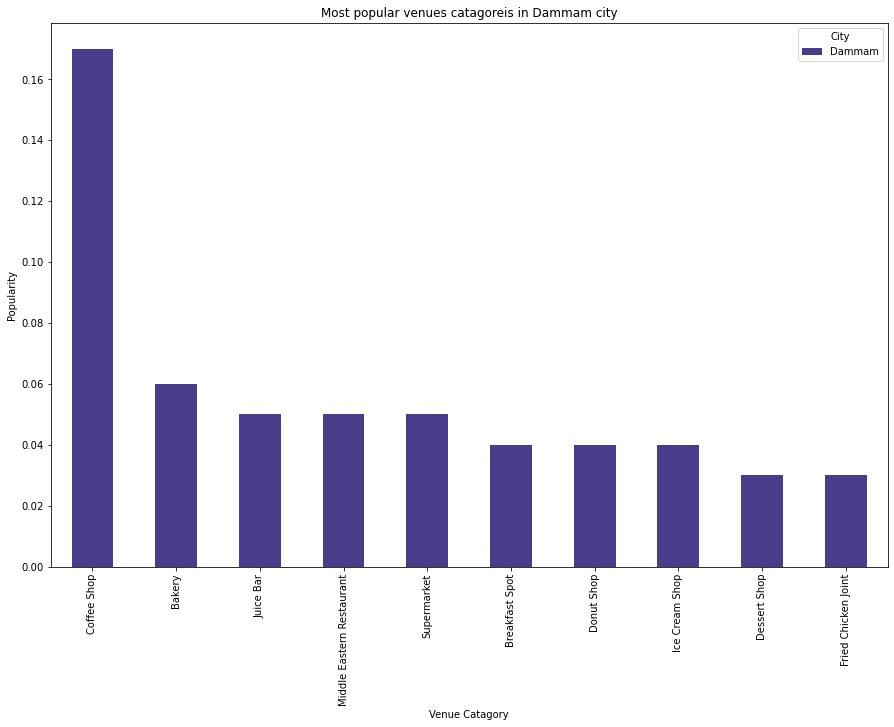

In [83]:
#Using bar plot can see what the most frequent types of venues in each of the three city
dfDMM.plot(kind = 'bar', figsize = (15, 10), color = 'darkslateblue')
plt.title('Most popular venues catagoreis in Dammam city')
plt.xlabel('Venue Catagory')
plt.ylabel('Popularity')
plt.show()

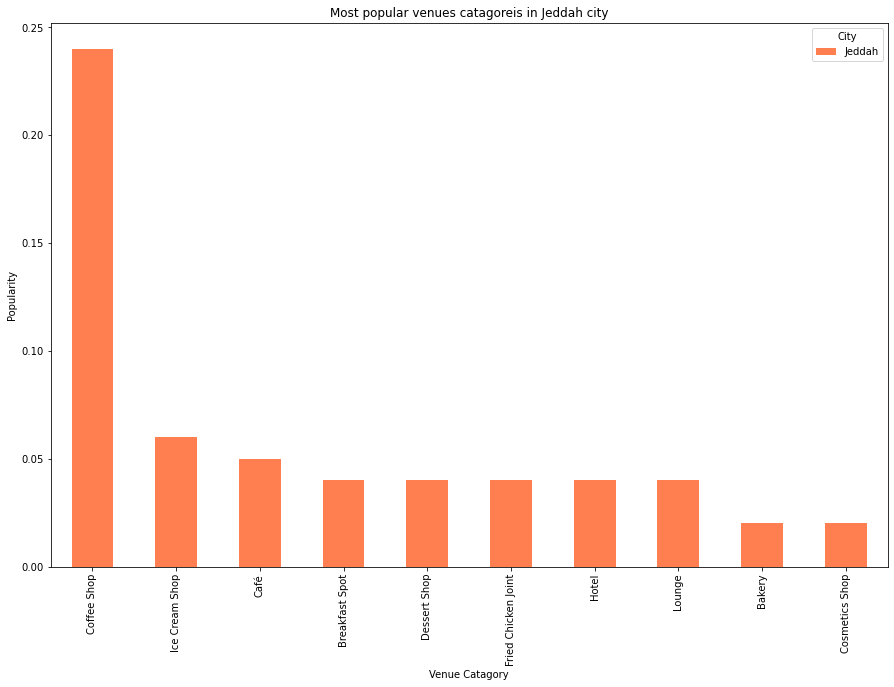

In [89]:
dfJED.plot(kind = 'bar', figsize = (15, 10), color = 'coral')
plt.title('Most popular venues catagoreis in Jeddah city')
plt.xlabel('Venue Catagory')
plt.ylabel('Popularity')
plt.show()

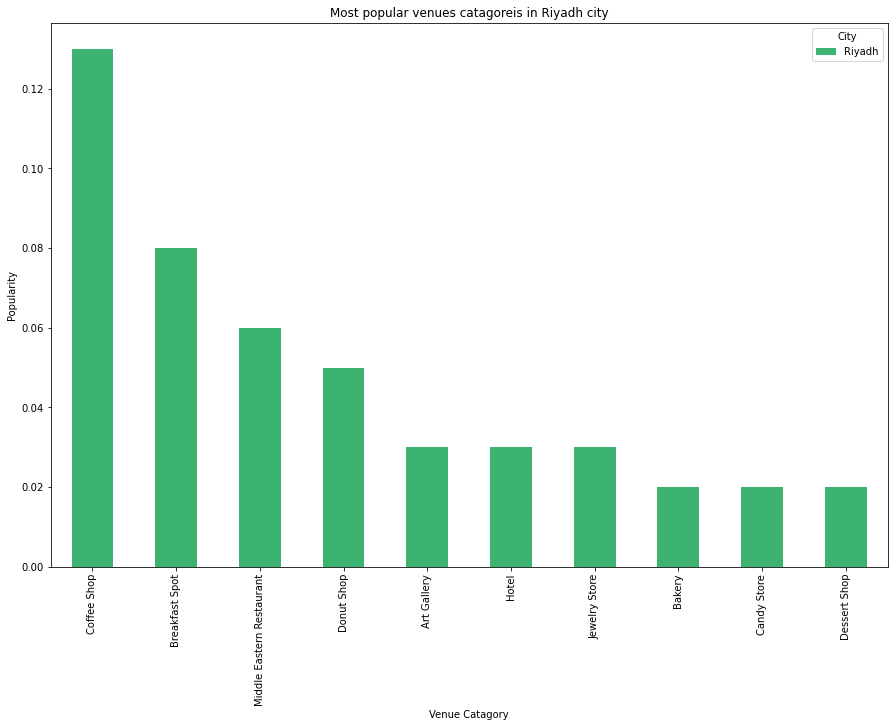

In [90]:
dfRIY.plot(kind = 'bar', figsize = (15, 10), color = 'mediumseagreen')
plt.title('Most popular venues catagoreis in Riyadh city')
plt.xlabel('Venue Catagory')
plt.ylabel('Popularity')
plt.show()

## Question 3: Is the location of a venue influences its popularity?

In [91]:
#Obtaining the coordinates of Saudi Arabia
address = 'Saudi Arabia'
geolocator = Nominatim(user_agent="KSA")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

25.6242618 42.3528328


In [92]:
#Map representation of Saudi Arabia
KSA_map = folium.Map(location=[latitude, longitude], zoom_start=4)
KSA_map

In [93]:
# instantiate a feature group for the Venues in the dataframe
VENUES = folium.map.FeatureGroup()

# loop through the venues and add each to the venue feature group
for lat, lng, in zip(df_venues.Latitude, df_venues.Longitude):
    VENUES.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_venues.Latitude)
longitudes = list(df_venues.Longitude)
labels = list(df_venues.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(KSA_map)    
    
# add venues to map
KSA_map.add_child(VENUES)

In [94]:
#This is to cluster the locations instead of having a congested map with markers
from folium import plugins

# let's start again with a clean copy of the map of Saudi Arabia
KSA_map = folium.Map(location=[latitude, longitude], zoom_start=4)

# instantiate a mark cluster object for the venues in the dataframe
VENUES = plugins.MarkerCluster().add_to(KSA_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_venues.Latitude, df_venues.Longitude, df_venues.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(VENUES)

# display map
KSA_map

**This marks down the end of this code. The data has been visualizad to aid the reader in understanding the trend and what are the top 10 venues catagories
in each city. Moreover, all locations have been mapped using *Folium Library*. This will give further information on the locations that a business owner may target like for example opening a resturant or a cafe**